# Exercice 1: Deep autoencoders

**Degree** Master Inter-Universitario de Data Science 

**Course** Machine Learning I

**Lecturer** Ignacio Heredia

---

**Objective**

Create a deep autoencoder and visualize the results.

**Duration**

60 min


**Load dataset**

In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


**Create the model**

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 5  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

**Train the model**

In [28]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.3553 - val_loss: 0.2691
Epoch 2/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.2515 - val_loss: 0.2303
Epoch 3/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2226 - val_loss: 0.2150
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2125 - val_loss: 0.2081
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2075 - val_loss: 0.2043
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2045 - val_loss: 0.2017
Epoch 7/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2022 - val_loss: 0.1996
Epoch 8/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2003 - val_loss: 0.1979
Epoch 9/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1988 - val_loss: 0.1964
Epoch

**Test the model**

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

In [30]:
encoded_imgs

array([[11.042935  ,  0.        ,  7.1877756 ,  5.2357683 , 13.014093  ],
       [ 6.0863676 , 23.256973  ,  7.693428  ,  8.77518   ,  3.8777313 ],
       [ 2.5978107 ,  3.5364516 ,  9.805876  ,  5.880327  ,  0.12396359],
       ...,
       [11.704072  ,  8.584132  , 11.680851  , 11.517142  , 23.46096   ],
       [ 1.9669538 ,  8.639628  ,  8.796865  , 11.169928  , 18.188868  ],
       [ 6.5135283 , 30.690065  ,  3.8378818 , 19.165054  , 22.98501   ]],
      dtype=float32)

**Plot the results**

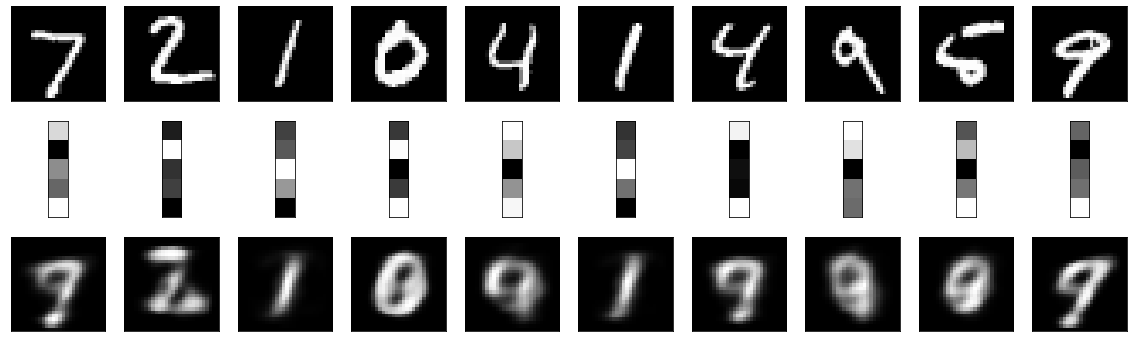

In [31]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(encoding_dim,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Cluster with t-SNE**

**Hint:** Check [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) function in sklearn.

In [0]:
import numpy as np
import csv
import matplotlib.pylab as plt
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(encoded_imgs)

In [38]:
X_embedded

array([[ 62.266777 ,  41.480507 ],
       [-17.544249 , -63.228584 ],
       [ 72.82619  , -47.04582  ],
       ...,
       [ -2.6059024,  67.21068  ],
       [ -9.548654 ,  25.892101 ],
       [-69.06985  , -35.071186 ]], dtype=float32)

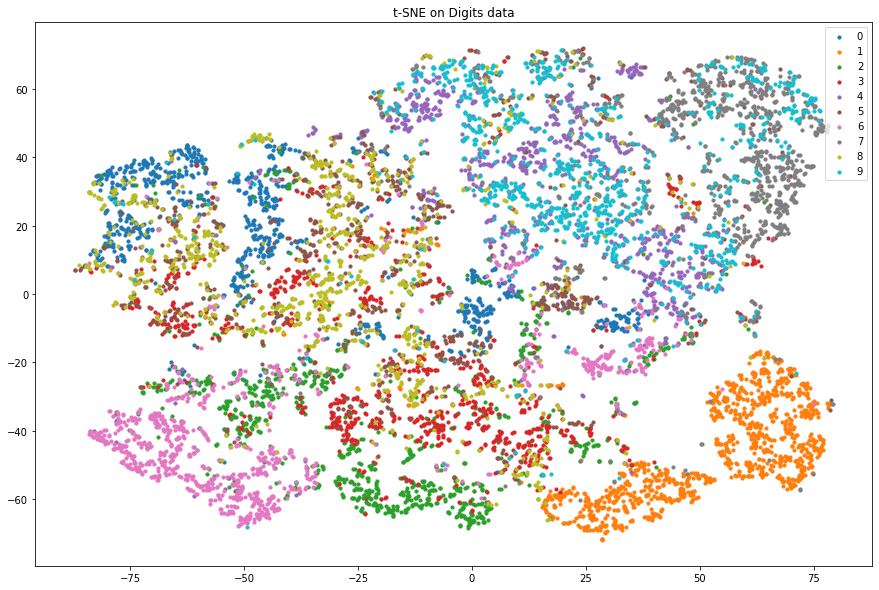

In [41]:
# Dibuja el mapa calculado

fig, ax = plt.subplots(figsize=[15,10])

for c in range(10):    
    i = np.where(y_test == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(X_embedded[i,0], X_embedded[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("t-SNE on Digits data")
plt.show()